<a href="https://colab.research.google.com/github/gunurusreekethana4/sreekethana_INFO5371_SPRING2023/blob/main/sreekethana_class_exercise_05_04182023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The fifth in-class-exercise (40 points in total, 4/18/2023)**

(20 points) The purpose of the question is to practice different machine learning algorithms for text classification as well as the performance evaluation. In addition, you are requried to conduct *10 fold cross validation (https://scikit-learn.org/stable/modules/cross_validation.html)* in the training. 

The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data. 

Algorithms:

(1) MultinominalNB

(2) SVM 

(3) KNN 

(4) Decision tree

(5) Random Forest

(6) XGBoost

(7) Word2Vec

(8) BERT

Evaluation measurement:

(1) Accuracy

(2) Recall

(3) Precison 

(4) F-1 score

In [30]:
# Write your code here

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import re




# Load train data
data_train = pd.read_csv(r'stsa-train.txt',sep = 'delimiter=',header= None,names=['Text'])

data_train[['Sentiment','Text']] = data_train["Text"].str.split(" ", n=1, expand=True)

print(data_train.head())


# Load test data
data_test = pd.read_csv(r'stsa-test.txt',sep = 'delimiter=',header= None,names=['Text'])
data_test[['Sentiment','Text']] = data_test["Text"].str.split(" ", n=1, expand=True)
print(data_train.head())





                                                Text Sentiment
0  a stirring , funny and finally transporting re...         1
1  apparently reassembled from the cutting-room f...         0
2  they presume their audience wo n't sit still f...         0
3  this is a visually stunning rumination on love...         1
4  jonathan parker 's bartleby should have been t...         1
                                                Text Sentiment
0  a stirring , funny and finally transporting re...         1
1  apparently reassembled from the cutting-room f...         0
2  they presume their audience wo n't sit still f...         0
3  this is a visually stunning rumination on love...         1
4  jonathan parker 's bartleby should have been t...         1


<ipython-input-30-470619c51f02>:17: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data_train = pd.read_csv(r'stsa-train.txt',sep = 'delimiter=',header= None,names=['Text'])
<ipython-input-30-470619c51f02>:25: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data_test = pd.read_csv(r'stsa-test.txt',sep = 'delimiter=',header= None,names=['Text'])


In [20]:
import nltk
import re
import string
nltk.download('stopwords')
nltk.download('wordnet')
stopword=nltk.corpus.stopwords.words('english')
from nltk.stem import WordNetLemmatizer
w_l= WordNetLemmatizer()
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    Message = text.lower()
    Message = re.sub('\[.*?\]', '', Message)
    Message = re.sub('https?://\S+|www\.\S+', '', Message)
    Message = re.sub('<.*?>+', '', Message)
    Message = re.sub('[%s]' % re.escape(string.punctuation), '', Message)
    Message = re.sub('\n', '', Message)
    Message = re.sub('\w*\d\w*', '', Message)
    return Message

# Create a new column called cleaned_Message in data_train
data_train['cleaned_text'] = data_train['Text'].apply(clean_text)
print(data_train.head(1))

# Create a new column called cleaned_Message in data_test
data_test['cleaned_text'] = data_test['Text'].apply(clean_text) 
print(data_train.head(1))



  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                                Text Sentiment  \
0  stirring , funny finally transporting re-imagi...         1   

                                        cleaned_text  
0  stirring  funny finally transporting reimagini...  
                                                Text Sentiment  \
0  stirring , funny finally transporting re-imagi...         1   

                                        cleaned_text  
0  stirring  funny finally transporting reimagini...  


In [3]:
# Split the data into training and validation sets
from sklearn.feature_extraction.text import TfidfVectorizer

train_data, val_data, train_labels, val_labels = train_test_split(data_train['Text'], data_train['Sentiment'], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(preprocessor=clean_text)
train_vectors = vectorizer.fit_transform(train_data)
val_vectors = vectorizer.transform(val_data)



# Split the data into test and validation sets
test_data, val_data, test_labels, val_labels = train_test_split(data_test['Text'], data_test['Sentiment'], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(preprocessor=clean_text)
test_vectors = vectorizer.fit_transform(test_data)
val_vectors = vectorizer.transform(val_data)






In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from xgboost import XGBClassifier
!pip install --upgrade scikit-learn
!pip install --upgrade pandas



cvect = CountVectorizer()
X=cvect.fit_transform(data_train['Text'])

tf_vect=TfidfVectorizer(use_idf=True)
X_idf=tf_vect.fit_transform(data_train['Text'])

print(X_idf.shape)
X_idf_df=pd.DataFrame(X_idf.toarray(), columns=tf_vect.get_feature_names_out())

X_train_idf = tf_vect.transform(data_train['Text'])
print(X_idf.shape)

X_test_idf = tf_vect.transform(data_test['Text'])
print(X_idf.shape)



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pandas-2.0.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.4 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.21.0 requires pandas<2,>=0.25, but you have pandas 2.0.0 which is incompatible.
google-colab 1.0.0 requires pandas~=1.5.3, but you have pandas 2.0.0 which is incompatible.
(6920, 13789)
(6920, 13789)
(6920, 13789)


In [5]:
MNB = MultinomialNB()
SVM = LinearSVC()
KNN = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()
XGB = XGBClassifier()
x_train, x_test, y_train, y_test = train_test_split(X_idf_df, data_train['Sentiment'].values,
                                                test_size=0.2, random_state=42)

(1) MultinominalNB

In [6]:
# Import necessary modules
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB

# Create an instance of the Multinomial Naive Bayes classifier
mnb = MultinomialNB()

# Train the classifier on the training data
mnb.fit(x_train, y_train)

# Use the trained classifier to predict the labels of the test data
y_pred = mnb.predict(x_test)

# Compute and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Compute and print the classification report
report = classification_report(y_test, y_pred)
print(report)

# Perform 10-fold cross-validation on the test data
scores = cross_val_score(mnb, x_test, y_test, cv=10)

# Compute and print the mean accuracy score
mean_accuracy = scores.mean()
print(f"Mean accuracy multinomial: {mean_accuracy}")


Accuracy: 0.7969653179190751
              precision    recall  f1-score   support

           0       0.86      0.70      0.77       671
           1       0.76      0.89      0.82       713

    accuracy                           0.80      1384
   macro avg       0.81      0.79      0.79      1384
weighted avg       0.81      0.80      0.79      1384

Mean accuracy multinomial: 0.7434365551037432


2.SVM

In [ ]:
SVM_test = SVM.fit(x_train,y_train)
Y_SVM = SVM_test.predict(x_test)
print('Accuracy %s' % accuracy_score(Y_SVM,y_test))
print(classification_report(y_test,Y_SVM))
from sklearn.model_selection import cross_val_score
sco_SVM = cross_val_score(SVM, x_test, y_test, cv=10)
print("Accuracy for SVM",sco_SVM.mean())

Accuracy 0.809971098265896
              precision    recall  f1-score   support

           0       0.83      0.76      0.80       671
           1       0.79      0.85      0.82       713

    accuracy                           0.81      1384
   macro avg       0.81      0.81      0.81      1384
weighted avg       0.81      0.81      0.81      1384

Accuracy for SVM 0.740610989469294


3.KNN

In [ ]:
# Create a KNN classifier object
knn = KNeighborsClassifier()

# Train the classifier on the training data
knn.fit(x_train, y_train)

# Predict the labels of the test data
y_pred = knn.predict(x_test)

# Compute and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Compute and print the classification report
report = classification_report(y_test, y_pred)
print(report)

# Perform 10-fold cross-validation on the test data
scores = cross_val_score(knn, x_test, y_test, cv=10)

# Compute and print the mean accuracy score
mean_accuracy = scores.mean()
print(f"Mean accuracy KNN: {mean_accuracy}")


Accuracy: 0.7283236994219653
              precision    recall  f1-score   support

           0       0.75      0.67      0.70       671
           1       0.71      0.79      0.75       713

    accuracy                           0.73      1384
   macro avg       0.73      0.73      0.73      1384
weighted avg       0.73      0.73      0.73      1384

Mean accuracy KNN: 0.6964706495673028


(4) Decision tree

In [ ]:
# Train Decision Tree classifier
dec_tree_test = DT.fit(x_train, y_train)

# Predict using Decision Tree classifier
Y_dec_tree = dec_tree_test.predict(x_test)

# Print accuracy score and classification report
acc_dec_tree = accuracy_score(Y_dec_tree, y_test)
print(f"Accuracy: {acc_dec_tree}")
print(classification_report(y_test, Y_dec_tree))

# Cross-validation
scores_DT = cross_val_score(DT, x_test, y_test, cv=10)
print("Cross-validation accuracy score for Decision Trees: ", scores_DT.mean())


Accuracy: 0.6083815028901735
              precision    recall  f1-score   support

           0       0.60      0.56      0.58       671
           1       0.61      0.65      0.63       713

    accuracy                           0.61      1384
   macro avg       0.61      0.61      0.61      1384
weighted avg       0.61      0.61      0.61      1384

Cross-validation accuracy score for Decision Trees:  0.5939839432801585


(5) Random Forest

In [ ]:
# Fit and evaluate the Random Forest model
RF.fit(x_train, y_train)
Y_RF = RF.predict(x_test)
accuracy_RF = accuracy_score(Y_RF, y_test)
print('Accuracy of Random Forest: {:.2f}%'.format(accuracy_RF*100))
print(classification_report(y_test, Y_RF))

# Cross-validate the Random Forest model
scores_RF = cross_val_score(RF, x_test, y_test, cv=10)
print("Cross-validation Accuracy of Random Forest: {:.2f}%".format(scores_RF.mean()*100))


Accuracy of Random Forest: 71.89%
              precision    recall  f1-score   support

           0       0.74      0.64      0.69       671
           1       0.70      0.79      0.74       713

    accuracy                           0.72      1384
   macro avg       0.72      0.72      0.72      1384
weighted avg       0.72      0.72      0.72      1384

Cross-validation Accuracy of Random Forest: 67.85%


(6) XGBoost

In [ ]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

XGB_test = XGB.fit(x_train,y_train)
Y_XGB = XGB_test.predict(x_test)
print('Accuracy %s' % accuracy_score(Y_XGB,y_test))
print(classification_report(y_test,Y_XGB))
sco_XGB = cross_val_score(XGB, x_test, y_test, cv=10)
print("Accuracy using XGBoost",sco_XGB.mean())


Accuracy 0.7283236994219653
              precision    recall  f1-score   support

           0       0.77      0.63      0.69       671
           1       0.70      0.82      0.76       713

    accuracy                           0.73      1384
   macro avg       0.73      0.73      0.72      1384
weighted avg       0.73      0.73      0.73      1384

Accuracy using XGBoost 0.6654415597956418


(7) Word2Vec

In [ ]:
import numpy as np
from gensim.models import Word2Vec
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Define the Word2Vec model
model_w2v = Word2Vec(sentences=[sentence.split() for sentence in data_train], vector_size=100, window=5, min_count=1, workers=4)

# Create vectors for the training and test data using the Word2Vec model
train_vectors = np.array([np.mean([model_w2v.wv[token] for token in sentence.split()], axis=0) for sentence in data_train])
test_vectors = np.array([np.mean([model_w2v.wv[token] for token in sentence.split()], axis=0) for sentence in data_test])

## Train a logistic regression model on the training vectors
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train_idf, data_train['Sentiment'])

# Make predictions on the test vectors
predictions = model_lr.predict(X_test_idf)

# Calculate evaluation metrics
accuracy = accuracy_score(data_test['Sentiment'], predictions)
recall = recall_score(data_test['Sentiment'], predictions, average='weighted')
precision = precision_score(data_test['Sentiment'], predictions, average='weighted')
f1 = f1_score(data_test['Sentiment'], predictions, average='weighted')

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)



Accuracy: 0.7902251510159253
Recall: 0.7902251510159253
Precision: 0.7914294936433314
F1 Score: 0.79002316534237


(8) BERT

In [24]:
!pip install simpletransformers
import pandas as pd
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from collections import Counter
from simpletransformers.classification import ClassificationModel
from sklearn.metrics import f1_score, accuracy_score
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
test_labels = le.fit_transform(data_test['Sentiment'])


cuda_available = torch.cuda.is_available()
train_args ={"reprocess_input_data": True,
             "fp16":False,
             "use_early_stopping" : 0,
             "num_train_epochs": 40}

model = ClassificationModel(
    "bert", 'bert-base-uncased',
    num_labels=2,
    args=train_args,
     use_cuda=cuda_available
)

data_test['Text'] = data_test['Text'].apply(clean_text)
data_test = pd.DataFrame(data_test, columns=['Text'])
data_test['Sentiment'] = test_labels


test_labels = np.array(data_test['Sentiment']).reshape(-1)




labels = np.array(data_test['Sentiment']).reshape(-1)



data_train['Text'] = data_train['Text'].apply(clean_text)
data_test= pd.DataFrame(data_test)
result, model_outputs, wrong_predictions = model.eval_model(data_test, acc=accuracy_score)
# Evaluate the model on the test data
result, model_outputs, wrong_predictions = model.eval_model(data_test, acc=accuracy_score)

# Extract predicted labels and probabilities from model outputs
predicted_labels = np.argmax(model_outputs, axis=1)
probabilities = model_outputs[:, 1]

# Compute evaluation metrics
f1 = f1_score(test_labels, predicted_labels)
accuracy = accuracy_score(test_labels, predicted_labels)
precision = precision_score(test_labels, predicted_labels)
recall = recall_score(test_labels, predicted_labels)

# Print the evaluation metrics
print("F1 Score: {:.4f}".format(f1))
print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model th

  0%|          | 0/1821 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/228 [00:00<?, ?it/s]

/usr/local/lib/python3.9/dist-packages/simpletransformers/classification/classification_model.py:1454: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/1821 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/228 [00:00<?, ?it/s]

F1 Score: 0.6659
Accuracy: 0.4992
Precision: 0.4992
Recall: 1.0000


(20 points) The purpose of the question is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K-means

DBSCAN

Hierarchical clustering

Word2Vec

BERT

You can refer to of the codes from  the follwing link below. 
https://www.kaggle.com/karthik3890/text-clustering 

In [28]:
#Write your code here.
import pandas as pd
data = pd.read_csv('Amazon_Unlocked_Mobile.csv')
data.head()




,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5.0,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4.0,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5.0,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4.0,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4.0,Great phone to replace my lost phone. The only...,0.0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<Axes: ylabel='count'>

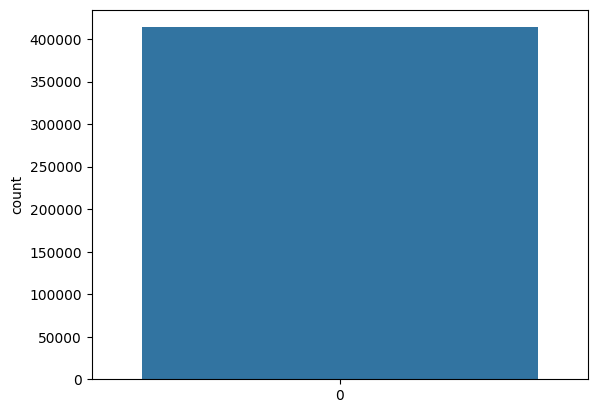

In [37]:
# Understand how customer ratings are distributed
!pip install matplotlib

import seaborn as sns
sns.countplot(data.Rating)

In [31]:
def part(x1):
    if x1 < 3:
        return 'negative'
    return 'positive'
act_Sco = data['Rating']
posNeg = act_Sco.map(part) 
data['RatingPosNeg'] = posNeg


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-lyx javascript-common libimagequant0 libjs-jquery libjs-jquery-ui
  python-matplotlib-data python3-cycler python3-dateutil python3-kiwisolver
  python3-numpy python3-olefile python3-pil python3-pyparsing
  ttf-bitstream-vera
Suggested packages:
  apache2 | lighttpd | httpd libjs-jquery-ui-docs python-cycler-doc dvipng
  gir1.2-gtk-3.0 ghostscript inkscape ipython3 python-matplotlib-doc
  python3-cairocffi python3-gi-cairo python3-gobject python3-nose
  python3-pyqt5 python3-scipy python3-sip python3-tornado texlive-extra-utils
  texlive-latex-extra ttf-staypuft python-numpy-doc python3-pytest
  python3-numpy-dbg python-pil-doc python3-pil-dbg python-pyparsing-doc
The following NEW packages will be installed:
  fonts-lyx javascript-common libimagequant0 libjs-jquery libjs-jquery-ui
  python-matplotlib-data python3-cycler python3-dat

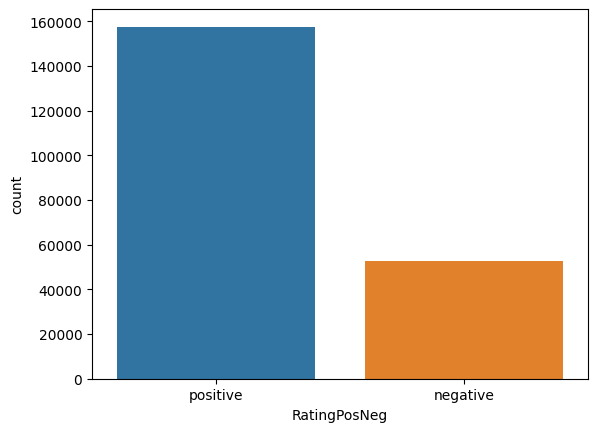

In [32]:
!apt install python3-matplotlib
!pip install matplotlib
!apt install python3-matplotlib


print(data.RatingPosNeg.astype('category').value_counts())
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=data, x='RatingPosNeg')
plt.show()






In [40]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
sno = nltk.stem.SnowballStemmer('english') 
st=set(stopwords.words('english'))

fi = data

def clpunc(se):
    clean_dt = re.sub(r'[?|!|\'|"|#]',r'',se)
    clean_dt = re.sub(r'[.|,|)|(|\|/]',r' ',clean_dt)
    return  clean_dt
final = data.sample(n=10000, random_state=1)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:
import re

i=0
st1=' '
fi_str=[]
all_pos_wrds=[] 
all_neg_wrds=[] 
s1=''
for se in final['Reviews'].values:
    fil_se=[]
    try:
      for w in se.split():
          for c in clpunc(w).split():
              if((c.isalpha()) & (len(c)>2)):    
                  if(c.lower() not in st):
                      s=(sno.stem(c.lower())).encode('utf8')
                      fil_se.append(s)
                      if (final['RatingPosNeg'].values)[i] == 'positive': 
                          all_pos_wrds.append(s) 
                      if(final['RatingPosNeg'].values)[i] == 'negative':
                          all_neg_wrds.append(s) 
                  else:
                      continue
              else:
                  continue 
      str1 = b" ".join(fil_se)
      
      fi_str.append(str1)
      i+=1
    except AttributeError as e:
      fi_str.append('')
      i+=1

In [47]:
final['CleanedText']=fi_str 
final['CleanedText']=final['CleanedText'].str.decode("utf-8")
final = final.fillna('')

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
ct_vect = CountVectorizer()
bo = ct_vect.fit_transform(final['CleanedText'].values)
print(bo.shape)

(10000, 8444)


In [50]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize a CountVectorizer object
count_vect = CountVectorizer()
data.dropna(inplace=True)


# Fit the CountVectorizer object to your data
count_vect.fit(data['Reviews'])

# Get the feature names
terms = count_vect.vocabulary_.keys()

# Print the feature names
print(list(terms))


['feel', 'so', 'lucky', 'to', 'have', 'found', 'this', 'used', 'phone', 'us', 'not', 'hard', 'at', 'all', 'on', 'line', 'from', 'someone', 'who', 'upgraded', 'and', 'sold', 'one', 'my', 'son', 'liked', 'his', 'old', 'that', 'finally', 'fell', 'apart', 'after', 'years', 'didn', 'want', 'an', 'upgrade', 'thank', 'you', 'seller', 'we', 'really', 'appreciate', 'it', 'your', 'honesty', 're', 'said', 'recommend', 'very', 'highly', 'would', 'but', 'them', 'again', 'nice', 'up', 'grade', 'pantach', 'revue', 'clean', 'set', 'easy', 'never', 'had', 'android', 'they', 'are', 'fantastic', 'say', 'the', 'least', 'perfect', 'size', 'for', 'surfing', 'social', 'media', 'great', 'samsung', 'pleased', 'works', 'good', 'goes', 'slow', 'sometimes', 'its', 'love', 'replace', 'lost', 'only', 'thing', 'is', 'volume', 'button', 'does', 'work', 'can', 'still', 'go', 'into', 'settings', 'adjust', 'other', 'than', 'job', 'until', 'am', 'eligible', 'thaanks', 'already', 'with', 'problems', 'know', 'stated', 'was

In [51]:
from sklearn.cluster import KMeans
mod = KMeans(n_clusters=10,init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=99, copy_x=True, algorithm='auto')
mod.fit(bo)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


KMeans(algorithm='auto', n_clusters=10, n_init=10, random_state=99)

In [52]:
lab = mod.labels_
cluster_center=mod.cluster_centers_

In [53]:
from sklearn import metrics
silhouette_score = metrics.silhouette_score(bo, lab, metric='euclidean')
silhouette_score

0.27313704420543833

In [54]:
dfrme = final
dfrme['Bow Clus Label'] = mod.labels_ 
dfrme.head(2)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,RatingPosNeg,CleanedText,Bow Clus Label
103270,BLU Advance 4.0L Unlocked Smartphone -Global G...,BLU,149.99,4,"Had it for 1 year, can't really complain. Gave...",0.0,positive,year cant realli complain gave teenag replac w...,5
297857,"POSH MOBILE MICRO X, The Smallest Smartphone i...",Posh Mobile,49.99,5,"Perfect, thanks",1.0,positive,perfect thank,0


In [55]:
dfrme.groupby(['Bow Clus Label'])['Reviews'].count()

Bow Clus Label
0    7396
1       1
2       3
3      83
4     124
5    1922
6      16
7       1
8       2
9     452
Name: Reviews, dtype: int64

In [56]:
print("Top terms per cluster:")
ord_centroids = mod.cluster_centers_.argsort()[:, ::-1]
terms = list(count_vect.vocabulary_.keys())
for i1 in range(10):
    print("Cluster %d:" % i1, end='')
    for i in ord_centroids[i1, :10]:
        print(' %s' % terms[i], end='')
        print()


Top terms per cluster:
Cluster 0: persists
 hassles
 pins
 technical
 happier
 teams
 mildly
 unsure
 leds
 unnecessy
Cluster 1: holds
 bedroom
 theirs
 persists
 dips
 kumbee
 distortion
 scracthes
 manual
 waterproof
Cluster 2: persists
 lame
 match
 teams
 nigeria
 thanksbye
 hassles
 leds
 adapt
 phonethe
Cluster 3: persists
 teams
 ffreeze
 leds
 unnecessy
 usabilityi
 hassles
 blocking
 gift
 pins
Cluster 4: persists
 teams
 usabilityi
 ffreeze
 gift
 leds
 blocking
 add
 pins
 companies
Cluster 5: persists
 hassles
 teams
 technical
 unnecessy
 pins
 leds
 ffreeze
 usabilityi
 psxpro
Cluster 6: persists
 teams
 usabilityi
 leds
 blocking
 hassles
 ffreeze
 unnecessy
 pins
 theirs
Cluster 7: persists
 unnecessy
 teams
 additionally
 friend
 leds
 impression
 blocking
 pins
 establishment
Cluster 8: teams
 blocking
 needle
 usabilityi
 persists
 oem
 unnecessy
 technical
 marks
 click
Cluster 9: persists
 teams
 hassles
 unnecessy
 ffreeze
 leds
 psxpro
 usabilityi
 pins
 technica

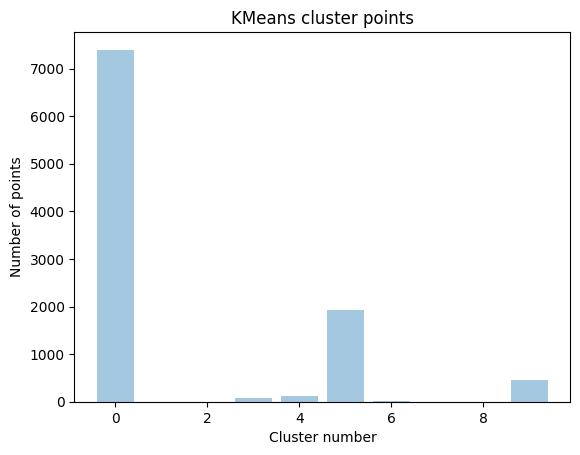

In [57]:
import matplotlib.pyplot as plt
plt.bar([x1 for x1 in range(10)], dfrme.groupby(['Bow Clus Label'])['Reviews'].count(), alpha = 0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
idf_vect = TfidfVectorizer()
idf = idf_vect.fit_transform(final['CleanedText'].values)
idf.shape

(10000, 8444)

In [59]:
from sklearn.cluster import KMeans
mod = KMeans(n_clusters = 10,random_state=99)
mod.fit(idf)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10, random_state=99)

In [60]:
lab_tf = mod.labels_
cluster_center_tf=mod.cluster_centers_
cluster_center_tf

array([[4.01978460e-04, 1.34721737e-05, 6.47380325e-05, ...,
        1.44784473e-04, 1.44784473e-04, 1.51394531e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [61]:
ter = idf_vect.get_feature_names_out()
ter[1:10]





array(['aac', 'aand', 'ab', 'abandon', 'abc', 'abd', 'abeautifulit',
       'abierto', 'abil'], dtype=object)

In [62]:
from sklearn import metrics
silhouette_score_tf = metrics.silhouette_score(idf, lab_tf, metric='euclidean')
silhouette_score_tf

0.0631973109808856

In [63]:
dfrme1 = dfrme
dfrme1['Tfidf Clus Label'] = mod.labels_
dfrme1.head(5)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,RatingPosNeg,CleanedText,Bow Clus Label,Tfidf Clus Label
103270,BLU Advance 4.0L Unlocked Smartphone -Global G...,BLU,149.99,4,"Had it for 1 year, can't really complain. Gave...",0.0,positive,year cant realli complain gave teenag replac w...,5,3
297857,"POSH MOBILE MICRO X, The Smallest Smartphone i...",Posh Mobile,49.99,5,"Perfect, thanks",1.0,positive,perfect thank,0,5
40075,Apple iPhone 5s 16GB (Silver) - T-Mobile,Apple,75.65,1,"the back camera stopped working, the phone tou...",1.0,negative,back camera stop work phone touch screen stop ...,5,3
100790,Blackberry Torch 9800 Unlocked Phone with 5 MP...,BlackBerry,82.62,5,Good!,0.0,positive,good,0,2
58055,Apple iPhone 6 Plus 64GB Unlocked Smartphone -...,,529.99,5,no complaints. worked fine and still working p...,0.0,positive,complaint work fine still work perfect tear we...,0,0


In [64]:
dfrme1.groupby(['Tfidf Clus Label'])['Reviews'].count()

Tfidf Clus Label
0    3967
1     370
2     389
3    3547
4     403
5     252
6     373
7     322
8     172
9     205
Name: Reviews, dtype: int64

In [65]:
print("Top terms per cluster:")
order_centroids = mod.cluster_centers_.argsort()[:, ::-1]
for i1 in range(10):
    print("Cluster %d:" % i1, end='')
    for i in order_centroids[i1, :10]:
        print(' %s' % ter[i], end='')
        print()

Top terms per cluster:
Cluster 0: work
 good
 product
 thank
 nice
 phone
 use
 great
 like
 well
Cluster 1: excel
 product
 phone
 recommend
 thank
 love
 good
 seller
 purchas
 servic
Cluster 2: good
 phone
 product
 condit
 work
 far
 thank
 price
 cell
 problem
Cluster 3: phone
 use
 like
 work
 great
 one
 good
 batteri
 get
 new
Cluster 4: great
 phone
 work
 product
 buy
 condit
 price
 deal
 thank
 far
Cluster 5: perfect
 work
 condit
 phone
 product
 everyth
 love
 great
 thank
 came
Cluster 6: price
 awesom
 phone
 great
 good
 product
 work
 qualiti
 best
 fast
Cluster 7: love
 phone
 great
 new
 daughter
 good
 son
 thank
 iphon
 absolut
Cluster 8: excelent
 producto
 telefono
 celular
 recomendado
 telfono
 súper
 punto
 recomienda
 tlf
Cluster 9: expect
 met
 work
 phone
 better
 exceed
 product
 everyth
 great
 arriv


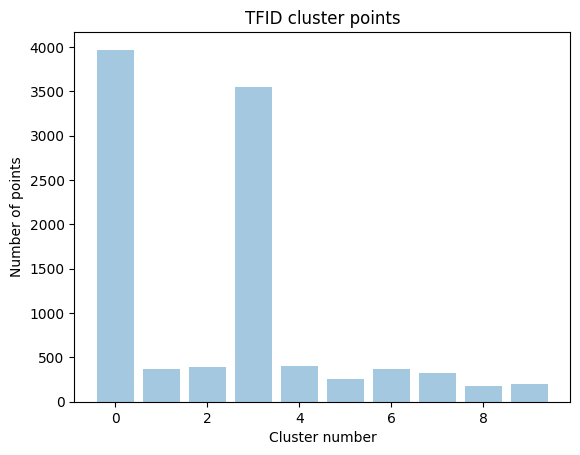

In [66]:
plt.bar([x1 for x1 in range(10)], dfrme1.groupby(['Tfidf Clus Label'])['Reviews'].count(), alpha = 0.4)
plt.title('TFID cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

In [67]:
i1=0
lst_of_sent=[]
for se in final['CleanedText'].values:
    lst_of_sent.append(se.split())

In [68]:
i1=0
lst_sent_tr=[]
for s in final['CleanedText'].values:
    filter_sen=[]
    for w in se.split():
        for cle in clpunc(w).split():
            if(cle.isalpha()):    
                filter_sen.append(cle.lower())
            else:
                continue 
    lst_sent_tr.append(filter_sen)
print(lst_sent_tr)

[['phone', 'chines', 'instruct', 'set', 'easili', 'chang', 'pocket', 'eleg', 'paperweight'], ['phone', 'chines', 'instruct', 'set', 'easili', 'chang', 'pocket', 'eleg', 'paperweight'], ['phone', 'chines', 'instruct', 'set', 'easili', 'chang', 'pocket', 'eleg', 'paperweight'], ['phone', 'chines', 'instruct', 'set', 'easili', 'chang', 'pocket', 'eleg', 'paperweight'], ['phone', 'chines', 'instruct', 'set', 'easili', 'chang', 'pocket', 'eleg', 'paperweight'], ['phone', 'chines', 'instruct', 'set', 'easili', 'chang', 'pocket', 'eleg', 'paperweight'], ['phone', 'chines', 'instruct', 'set', 'easili', 'chang', 'pocket', 'eleg', 'paperweight'], ['phone', 'chines', 'instruct', 'set', 'easili', 'chang', 'pocket', 'eleg', 'paperweight'], ['phone', 'chines', 'instruct', 'set', 'easili', 'chang', 'pocket', 'eleg', 'paperweight'], ['phone', 'chines', 'instruct', 'set', 'easili', 'chang', 'pocket', 'eleg', 'paperweight'], ['phone', 'chines', 'instruct', 'set', 'easili', 'chang', 'pocket', 'eleg', 'pa

In [69]:
import gensim
w2v_mod=gensim.models.Word2Vec(lst_sent_tr, vector_size=100, workers=4)


In [70]:
import numpy as np
se_vecs = []; 
for se in lst_sent_tr: 
    se_vec = np.zeros(100) 
    cnt_words =0;
    for word in se: 
        try:
            vec = w2v_mod.wv[word]
            se_vec += vec
            cnt_words += 1
        except:
            pass
    se_vec /= cnt_words
    se_vecs.append(se_vec)
se_vecs = np.array(se_vecs)
se_vecs = np.nan_to_num(se_vecs)
se_vecs.shape

(10000, 100)

In [71]:
n_clu = [x1 for x1 in range(3,11)]
n_clu

[3, 4, 5, 6, 7, 8, 9, 10]

In [72]:
squared_errors = []
for cluster in n_clu:
    kmeans = KMeans(n_clusters = cluster).fit(se_vecs)
    squared_errors.append(kmeans.inertia_)     
optimal_clusters = np.argmin(squared_errors) + 2  
print ("The optimal number of clusters obtained is - ", optimal_clusters)
print ("The loss for optimal cluster is - ", min(squared_errors))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-72-35c028bc6f70>:3: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters = cluster).fit(se_vecs)
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-72-35c028bc6f70>:3: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters = cluster).fit(se_vecs)
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `

The optimal number of clusters obtained is -  2
The loss for optimal cluster is -  0.0


<ipython-input-72-35c028bc6f70>:3: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters = cluster).fit(se_vecs)


In [73]:
from sklearn.cluster import KMeans
model2 = KMeans(n_clusters = optimal_clusters)
model2.fit(se_vecs)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-73-a5ea9372c7a3>:3: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  model2.fit(se_vecs)


KMeans(n_clusters=2)

In [74]:
word_cluster_pred=model2.predict(se_vecs)
word_cluster_pred_2=model2.labels_
word_cluster_center=model2.cluster_centers_
word_cluster_center[1:2]

array([[-1.80884406e-01,  1.44317800e-01,  3.36941976e-02,
         1.21833493e-01,  8.33848086e-02, -3.77378789e-03,
         1.86323250e-01,  1.46487228e-01, -2.10960897e-01,
        -7.43319897e-02,  6.65738988e-02, -6.31217526e-02,
         2.75036486e-02,  3.22665543e-02,  9.89247395e-02,
        -7.29272045e-02,  1.53264462e-01,  1.23625997e-01,
        -2.42639113e-01, -2.03896442e-01,  2.24456605e-04,
        -2.56677313e-02,  3.45908755e-01, -4.19085402e-02,
         6.62498590e-03,  3.42779284e-02,  4.01412361e-02,
         7.30880954e-02, -1.67812220e-01,  6.81231445e-02,
         1.77043163e-01, -1.12857722e-01, -3.90049635e-02,
        -1.71422686e-01, -1.67907963e-02,  9.28100616e-02,
         9.03113004e-02,  2.41398224e-02, -2.44525816e-02,
         3.30661900e-03,  1.05944145e-01, -6.35323874e-02,
        -1.32539509e-01,  2.10274924e-02,  1.57345795e-01,
         5.45458840e-02, -2.98826440e-02,  3.27402208e-03,
         1.25909766e-02, -4.50658576e-02,  3.54620591e-0

In [75]:
dafrme = dfrme1
dafrme['AVG-W2V Clus Label'] = model2.labels_
dafrme.head(2)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,RatingPosNeg,CleanedText,Bow Clus Label,Tfidf Clus Label,AVG-W2V Clus Label
103270,BLU Advance 4.0L Unlocked Smartphone -Global G...,BLU,149.99,4,"Had it for 1 year, can't really complain. Gave...",0.0,positive,year cant realli complain gave teenag replac w...,5,3,0
297857,"POSH MOBILE MICRO X, The Smallest Smartphone i...",Posh Mobile,49.99,5,"Perfect, thanks",1.0,positive,perfect thank,0,5,0


In [76]:
from sklearn.cluster import DBSCAN
mi_Pts = 2 * 100
def low_bound(nums, target): 
    l, r = 0, len(nums) - 1
    while l <= r: 
        mi_tr = int(l + (r - l) / 2)
        if nums[mi_tr] >= target:
            r = mi_tr - 1
        else:
            l = mi_tr + 1
    return l
def compute200thnearestneighbour(x, data):
    dists1 = []
    for val in data:
        dist = np.sum((x - val) **2 ) 
        if(len(dists1) == 200 and dists1[199] > dist): 
            l = int(low_bound(dists1, dist)) 
            if l < 200 and l >= 0 and dists1[l] > dist:
                dists1[l] = dist
        else:
            dists1.append(dist)
            dists1.sort()
    
    return dists1[199]

In [77]:
two_hund_neigh = []
for v1 in se_vecs[:1500]:
    two_hund_neigh.append( compute200thnearestneighbour(v1, se_vecs[:1500]) )
two_hund_neigh.sort()

In [78]:
mod_DB = DBSCAN(eps = 5, min_samples = mi_Pts, n_jobs=-1)
mod_DB.fit(se_vecs)

DBSCAN(eps=5, min_samples=200, n_jobs=-1)

In [79]:
dfrme_db = dafrme
dfrme_db['AVG-W2V Clus Label'] = mod_DB.labels_
dfrme_db.head(2)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,RatingPosNeg,CleanedText,Bow Clus Label,Tfidf Clus Label,AVG-W2V Clus Label
103270,BLU Advance 4.0L Unlocked Smartphone -Global G...,BLU,149.99,4,"Had it for 1 year, can't really complain. Gave...",0.0,positive,year cant realli complain gave teenag replac w...,5,3,0
297857,"POSH MOBILE MICRO X, The Smallest Smartphone i...",Posh Mobile,49.99,5,"Perfect, thanks",1.0,positive,perfect thank,0,5,0


<Axes: ylabel='count'>

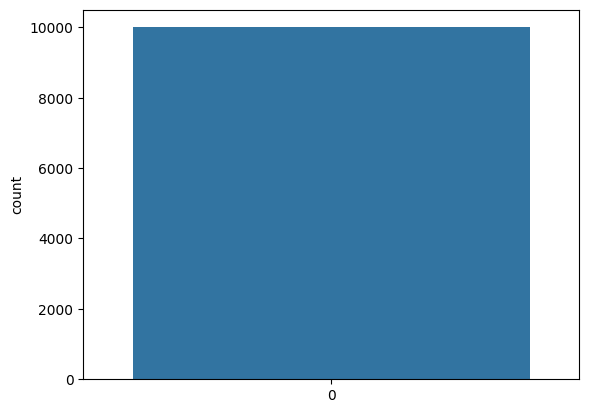

In [82]:

import seaborn as sns
dfrme_db = dfrme_db.reset_index(drop=True)
sns.countplot(dfrme_db['Tfidf Clus Label'])




In [83]:
dafrme.groupby(['AVG-W2V Clus Label'])['Reviews'].count()

AVG-W2V Clus Label
0    10000
Name: Reviews, dtype: int64

In [84]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  #took n=5 from dendrogram curve 
Agg=cluster.fit_predict(se_vecs)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [85]:
agg_dafrme_a = dfrme_db
agg_dafrme_a['AVG-W2V Clus Label'] = cluster.labels_
agg_dafrme_a.head(2)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,RatingPosNeg,CleanedText,Bow Clus Label,Tfidf Clus Label,AVG-W2V Clus Label
0,BLU Advance 4.0L Unlocked Smartphone -Global G...,BLU,149.99,4,"Had it for 1 year, can't really complain. Gave...",0.0,positive,year cant realli complain gave teenag replac w...,5,3,0
1,"POSH MOBILE MICRO X, The Smallest Smartphone i...",Posh Mobile,49.99,5,"Perfect, thanks",1.0,positive,perfect thank,0,5,0


In [86]:
agg_dafrme_a.groupby(['AVG-W2V Clus Label'])['Reviews'].count()

AVG-W2V Clus Label
0    9996
1       1
2       1
3       1
4       1
Name: Reviews, dtype: int64

In [87]:
import pandas as pd
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
from transformers import BertTokenizer, BertModel
import torch


In [88]:
df = pd.read_csv('Amazon_Unlocked_Mobile.csv')
df.dropna(inplace=True)
df = df.sample(frac=0.01, random_state=1)  # subsample for faster computation
df['text'] = df['Reviews'].apply(lambda x: x.lower().split())  # tokenize and convert to lowercase


In [89]:
from gensim.models import Word2Vec

w2v_model = Word2Vec(df['text'], vector_size=100, min_count=5, workers=4)


In [91]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

# download stopwords and punkt
nltk.download('stopwords')
nltk.download('punkt')

# define function to clean text
def clean_text(text):
    # remove non-letters and convert to lowercase
    text = re.sub('[^a-zA-Z]', ' ', text).lower()
    # tokenize text
    words = word_tokenize(text)
    # remove stop words
    words = [word for word in words if word not in stopwords.words('english')]
    # join words back into text
    text = ' '.join(words)
    return text

# check for non-string values in 'Reviews' column
non_string_values = data['Reviews'].apply(lambda x: type(x)).value_counts()
print(non_string_values)

# remove non-string values
data = data[data['Reviews'].apply(lambda x: isinstance(x, str))]

# clean text and tokenize
data['clean_text'] = data['Reviews'].apply(clean_text)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<class 'str'>    334335
Name: Reviews, dtype: int64


In [103]:
from gensim.models import Word2Vec
word2vec = Word2Vec( vector_size = 100, negative=5, hs=1, min_count=2, sample = 0)
word2vec.build_vocab([i for i in df['text']])
words = set(word2vec.wv.index_to_key )
import numpy as np
k = list()
for ls in df['text']:
  p = list()
  for i in ls:
    if i in words:
      p.append(word2vec.wv[i])
  k.append(np.array(p))
final = list()
for i in k:
  final.append(np.array(i))  
final_a = list()
for i in final:
  p = list()
  z = list()
  for j in i:
    p.append(j)
  for i in range(100):
    sum = 0
    for j in p:
      sum += j[i]
    try:
      avg = sum/len(p)
    except:
      continue
    z.append(avg)
  final_a.append(z) 
p = pd.DataFrame(final_a)
p = p.fillna(0)
p   

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.000345,0.002984,0.004483,0.004205,-0.000096,-0.002191,0.000480,0.006568,0.003141,-0.003404,...,0.007423,-0.000022,0.001239,-0.003197,-0.000836,0.002125,0.001163,-0.000900,0.001705,0.001644
1,-0.002027,0.005137,0.009465,-0.001612,-0.000332,-0.006170,0.004595,0.001383,0.001467,-0.004651,...,-0.006961,-0.000435,0.005567,-0.007500,0.000318,0.000635,0.004608,-0.003087,0.004488,0.008149
2,-0.000835,-0.002412,-0.000350,0.000700,-0.002377,-0.001813,-0.001051,0.001651,-0.000862,-0.000480,...,0.001926,-0.000987,-0.001946,0.000403,-0.000337,-0.000130,-0.000704,-0.000105,-0.000698,-0.000723
3,-0.002509,-0.005903,0.007483,-0.007260,-0.008966,-0.001790,-0.008367,0.000390,0.001946,-0.002469,...,0.003905,-0.006998,-0.005295,-0.007938,-0.005130,0.007071,0.009641,0.002155,0.000640,0.009524
4,0.009379,0.007365,0.006878,0.006103,0.005011,-0.001936,0.000133,0.005344,-0.006780,0.002469,...,0.004513,0.009033,-0.008302,0.002529,0.005807,-0.005812,-0.007120,-0.003860,0.003746,0.001422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3338,0.000256,0.000812,0.002409,0.000973,0.001638,-0.000204,0.001864,0.002229,-0.000429,-0.003719,...,0.001016,0.004053,-0.000626,0.002368,0.003070,0.001474,-0.000895,-0.003493,0.001248,-0.001946
3339,-0.000577,-0.000166,0.002062,-0.002991,0.002326,-0.000830,-0.003978,0.001332,0.000505,-0.002244,...,0.000154,-0.000964,-0.000632,-0.002306,0.001900,-0.000210,-0.000284,-0.002467,0.001414,-0.001254
3340,-0.000403,-0.000107,0.001602,0.000400,0.001283,0.001160,-0.001039,0.000453,0.002053,-0.000007,...,-0.001057,-0.001190,0.000638,0.001884,0.000884,-0.000450,0.000737,0.000840,-0.000526,0.000930
3341,0.001385,0.000329,0.000450,0.000627,-0.000676,-0.000271,0.001209,0.001756,-0.000337,-0.001499,...,0.000866,0.000694,0.001010,0.001934,0.001730,-0.000079,-0.001053,-0.000049,-0.000169,0.000743


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

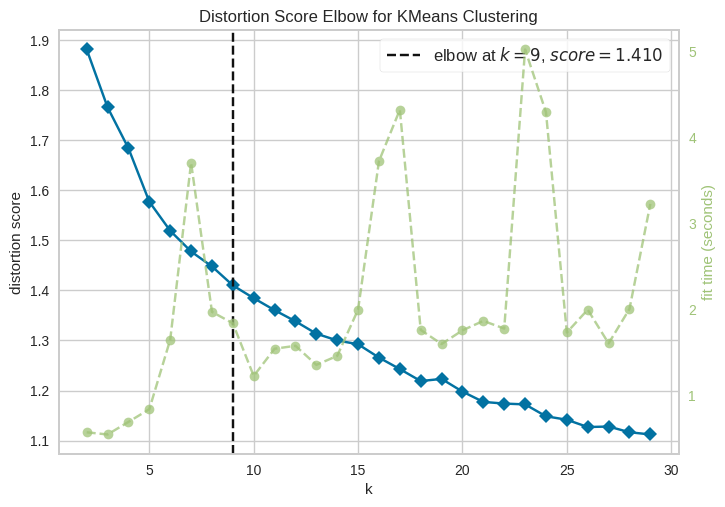

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [106]:
!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(p)
visualizer.show()

In [ ]:
k=KMeans(init='k-means++',n_clusters=11,n_init=100,random_state=0).fit(p)
labels =k.predict(p)
cd = df.assign(Cluster=labels)

In [111]:
for i in range(10):
  print(cd[cd['Cluster'] == i])
  print('*' * 10)

                                             Product Name  \
159366  BLU Tank II T193 Unlocked GSM Dual-SIM Cell Ph...   
135757  BLU Studio 5.0 C HD Smartphone - Unlocked - Or...   
278045  Nokia X3-02 Factory Unlocked Touch and Type GS...   
146517  BLU Studio C 5+5 LTE Smartphone - GSM Unlocked...   
317908  Samsung Galaxy J5 SM-J500H/DS GSM Factory Unlo...   
76384   Apple iPhone SE Unlocked Phone -16 GB Retail P...   
65763   Apple iPhone 6s 16 GB International Warranty U...   
44779                Apple iPhone 5s 32GB (Silver) - AT&T   
366567  Samsung Galaxy S6 G920F Unlocked Cell Phone - ...   
109788     BLU Dash JR 4.0 K Smartphone - Unlocked - Blue   
149624  Blu Studio C Mini Quad Core, 4.7" IPS, Android...   
113849  BLU Dash JR W D141w Unlocked GSM Dual-SIM Andr...   
354374  Samsung Galaxy S5 Mini G800H Unlocked Cellphon...   
38418          Apple iPhone 5c AT&T Cellphone, 16GB, Blue   
263246  Nokia C3-00 Unlocked Cell Phone (Slate) with Q...   
390212  Sony Xperia M4 A

In [112]:
!pip install -U sentence-transformers
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125942 sha256=91e6b8e02c5c371a1db8f6ba98ba099a33d16ab0b102c0a43a5ba34f5bf91260
  Stored in directory: /root/.cache/pip/wheels/71/67/06/162a3760c40d74dd40bc855d527008d26341c2b0ecf3e8e11f
Successfully built sentence-transformers


In [113]:
embedder = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')

In [10]:
from sentence_transformers import SentenceTransformer

# Define an embedder using the pre-trained 'bert-base-nli-mean-tokens' model
embedder = SentenceTransformer('bert-base-nli-mean-tokens')

# Call the encode method on the embedder object with the corpus variable as input
corpus_embeddings = embedder.encode(corpus)

# The corpus_embeddings variable now contains the embeddings for the input corpus



In [ ]:


final_1 = list()
for i in l:
  p = list()
  z = list()
  for j in i:
    p.append(j)
  for i in range(100):
    sum = 0
    for j in p:
      sum += j[i]
    try:
      avg = sum/len(p)
    except:
      continue
    z.append(avg)
  final_1.append(z)

In [21]:
k  = pd.DataFrame(final_a)
k = k.fillna(0)
k

""


In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(k)
visualizer.show()

In [ ]:
d=KMeans(init='k-means++',n_clusters=10,n_init=100,random_state=0).fit(k)
labels =d.predict(k)
cd = df.assign(Cluster=labels)

In [ ]:
for i in range(10):
  print(cd[cd['Cluster'] == i])
  print('*' * 10

In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.

In [ ]:
#You can write you answer here. (No code needed)
Kmeans: The Kmeans clustering method first groups the data based on similarity, and then the data points of k numbers are randomly assigned, showing the centroids of each group. The remaining data points that are left out are then mapped to the next closest centroid, and 
this process is repeated inside each of these groups until the data in the centroids changes and each of the data points are stored in the same group.

DBSCAN: DBSCAN (Density-based spatial clustering of applications with noise) is a density-based clustering 
algorithm where data points are grouped according to how similar they are to one another and areas with higher data densities are stored 
as a single group while areas with lower densities are stored as noise to help separate the data that are identical in nature.


Hierarchical clustering: The hierarchical method is achieved by repeatedly grouping each document or data point with those that are the 
most similar. Each of these data point combinations results in a node that is in the form of a hierarchical tree, and the resulting nodes are 
then combined with those that are the most similar.

Word2Vec: By anticipating the context in which words will appear in a given text corpus, Word2Vec is a predictive model that learns word embeddings.
Word2Vec embeddings can be learnt on smaller text corpora and are often lower dimensional.

BERT: BERT is a transformer-based language model that gains contextualized embeddings by training on a sizable amount of unlabeled text data.
BERT embeddings are often higher-dimensional and need a lot of data to train efficiently.





